<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **20 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task6.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперпарааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw6_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей, а чем похожи? 

Нейросети - это композиции линейных моделей, которые могут понимать нелинейные зависимости, в отличие от линейных моделей. Похожи в том смысле, что линейную модель можно рассматривать, как нейросеть с одним слоем.

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей, какая мотивация к использованию свёрточных?

При полносвязных нейронных сетях мы теряем локальные свойства объектов. Т.е. если они ичпользуются для распознования изображений, то мы теряем информацию о положении объекта. Сверточные нейронные сети могут искать объект в разных участках изображения, полносвязные только в одном месте. Например, если маленький объект расположен в углу картинки, то полносвязная сеть его не найдет, а сверточная может.

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- линейное преобразование Wx + b, можно интерпретировать как афинное преобразование, а также хорошо подходит для изображений, очень похож на линейную алгебру и поэтому работает быстро.
    - Convolution Layer -- сверточный слой, который сканирует (квадратные) участки небольшого фиксированого размера и преобразовывает их в один. В конце можем получить признаки участков.
    - Max Pooling -- слой, который делит признаки на квадраты (прямоугольники/n-мерные прямоугольники) и усредняет их. В отличие от Convolution Layer, квадраты не пересекаются. Следовательно, размерность становится меньше.
    - Softmax Layer -- вектор z преобразуется в $\frac{e^{z_i}}{\sum(e^{z_k})}$. Можно сказать, что на выходе дает вероятности принадлежности к классам. Аналог многомерной логистической функции. Минус - при очень больших значениях градиент может неконтролируемо уменьшаться.
    - ReLU - функция активации, которая не сжимает числа (в положительной полуплоскости). Быстро вычисляется произваодная (это просто индикатор положительности). Благодаря этой функции сеть сойдется очень быстро. Минус - нецентрирована.    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

Может. Softmax.

**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

Много параметров. Поверхность по которой мы шагаем очень сложно устроена, и из-за этого мы часто можнм "перескакивать" нужный оптимум. Например, momentum по факту является экспоненциальным усреднением (свертка с гауссовским ядром) и на него можно смотреть как на метод устранения шума во временном ряде из векторов антиградиента.

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

Backprop нужен для быстрого вычисления градиента по формуле дифференцирования сложной функции. Если его не использовать, то мы будем вынуждены считать градиенты для всех слоев, т.е. выполнять одни и те же действия по несколько раз, вместо подсчета по формуле производной для сложной функции, и все это будет происходить очень долго. На GPU backprop считается эффективно, ибо перемножение матриц на GPU можно распараллелить на несколько ядер, что значительно увеличит скорость выполнения операций. 

**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно ли ее использовать?

Кросс валидацию можно использовать, но в этом нет необходимости, ибо это будет очень долго: современные нейросети и так учатся неделями. Вместо этого используют test и  train data.

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 

<img src="img/conv.png" width="600">

<Ответ-Картинка :)>
<img src="answer.png" width="600">

-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [2]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I would use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run hw6_Modules.ipynb

Optimizer is implemented for you. 

In [3]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1     

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

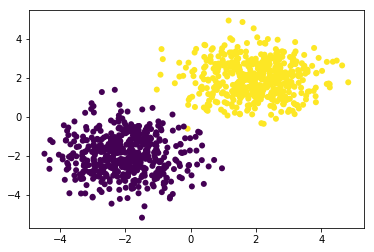

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [5]:
#net = Sequential()
#net.add(Linear(2, 2))
#net.add(SoftMax())

criterion = ClassNLLCriterion()
# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(SoftMax())
print(net)


Linear 2 -> 4
ReLU
Linear 4 -> 2
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [6]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [7]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

In [8]:
#вынесем код обучения нейросети и построение графика в отдельную
def trainNet(net, criterion, X, Y, n_epoch, batch_size, X_test=None, Y_test=None):
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X, Y), batch_size):

            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            sgd_momentum(net.getParameters(), 
                         net.getGradParameters(), 
                         optimizer_config,
                         optimizer_state)      

            loss_history.append(loss)

        # Visualize
        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))

        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()

        print('Current loss: %f' % loss)    

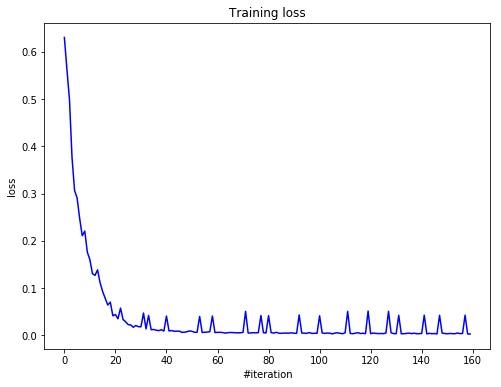

Current loss: 0.002869


In [9]:
trainNet(net, criterion, X, Y, n_epoch, batch_size)

# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [10]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

One-hot encode the labels first.

In [12]:
# Your code goes here. ################################################
y_temp = np.zeros((len(y), int(np.max(y)) + 1))
y = np.array(list(map(int, y)))
for i, y_ in enumerate(y):
    y_temp[i][y_] = 1
Y = y_temp

- **Compare** `ReLU`, `ELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

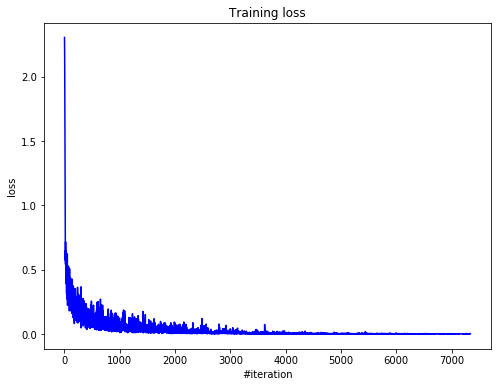

Current loss: 0.001888


In [13]:
# Your code goes here. ################################################
from sklearn.model_selection import train_test_split
net = Sequential()
net.add(Linear(784, 512))
net.add(ReLU())
net.add(Linear(512, 10))
net.add(SoftMax())


# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
#n_epoch = 20
#batch_size = 128

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=41)

net.set_training()

trainNet(net, criterion, X_train, y_train, n_epoch=20, batch_size=128)

In [14]:
net.set_evaluate()
preds = net.forward(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

0.9810822510822511

**Finally**, use all your knowledge to build a super cool model on this dataset, do not forget to split dataset into train and validation. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

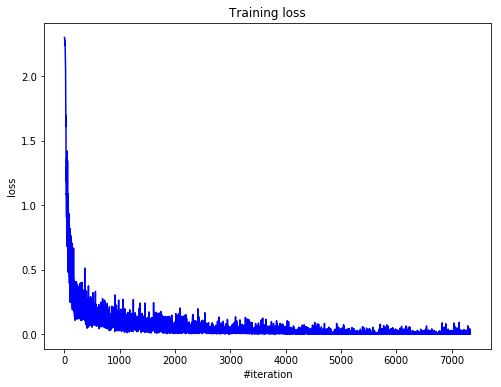

Current loss: 0.000103


In [15]:
# Your code goes here. ################################################
from sklearn.model_selection import train_test_split
net = Sequential()
net.add(Linear(784, 512))
net.add(ReLU())
net.add(Linear(512, 256))
net.add(ReLU())
net.add(Dropout(0.9))
net.add(Linear(256, 10))
net.add(SoftMax())


# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
#n_epoch = 20
#batch_size = 128

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=41)

net.set_training()

trainNet(net, criterion, X_train, y_train, n_epoch=20, batch_size=128)

Print here your accuracy. It should be around 90%.

In [16]:
# Your answer goes here. ################################################
net.set_evaluate()
preds = net.forward(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

0.9785281385281386

# Bonus Part: Autoencoder 

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="img/autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

In [44]:
# Your code goes here. ################################################

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

In [17]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
# Your code goes here. ################################################

# Now build a logistic regression or small classification net
cnet = Sequential()
cnet.add(Linear(30, 2))
cnet.add(SoftMax())

# Learn the weights
# Your code goes here. ################################################

# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
# Your code goes here. ################################################

# And add learned layers ontop.
autoenc = Sequential()
autoenc.add(cnet[0])
autoenc.add(cnet[1])

# Now optimize whole model
# Your code goes here. ################################################

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.

In [ ]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################